In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

completed = pd.read_csv('completed.csv')
terminated = pd.read_csv('terminated.csv')

In [2]:
completed['target'] = 1
terminated['target'] = 0

In [3]:
good_sample = completed.sample(n=5000, random_state=42)
bad_sample = terminated.sample(n=5000, random_state=42)
total = pd.concat([good_sample, bad_sample], ignore_index=True)

In [4]:
total.columns

Index(['Rank', 'NCT Number', 'Title', 'Acronym', 'Status', 'Study Results',
       'Conditions', 'Interventions', 'Outcome Measures',
       'Sponsor/Collaborators', 'Gender', 'Age', 'Phases', 'Enrollment',
       'Funded Bys', 'Study Type', 'Study Designs', 'Other IDs', 'Start Date',
       'Primary Completion Date', 'Completion Date', 'First Posted',
       'Results First Posted', 'Last Update Posted', 'Locations',
       'Study Documents', 'URL', 'target'],
      dtype='object')

In [5]:
good_phases = completed[completed['Phases'] != 'Not Applicable']
bad_phases = terminated[terminated['Phases'] != 'Not Applicable']
print(len(good_phases), len(bad_phases))

3071 6784


In [6]:
good_phases_sample = good_phases.sample(n=3000, random_state=42)
bad_phases_sample = bad_phases.sample(n=3000, random_state=42)
total_phases = pd.concat([good_phases_sample, bad_phases_sample], ignore_index=True)
phase_vs_target = total_phases.groupby(['Phases','target'])['Rank'].count()

In [7]:
labels = good_phases.Phases.unique()
labels.sort()
phase_terminate = [phase_vs_target[x] for x in range(len(phase_vs_target)) if x % 2 == 0]
phase_complete = [phase_vs_target[x] for x in range(len(phase_vs_target)) if x % 2 != 0]

In [8]:
d = len(phase_terminate)
w = 0.8
first_x = [2*element + w*1 for element in range(d)]
second_x = [2*element + w*2 for element in range(d)]

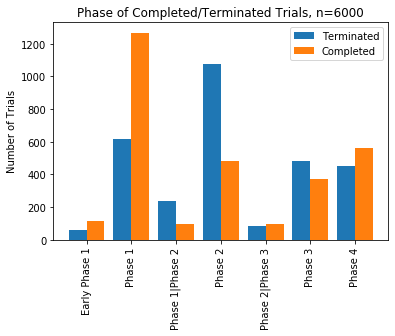

In [9]:
ax = plt.subplot()
ax.bar(first_x, phase_terminate)
ax.bar(second_x, phase_complete)
ax.set_xticks([(x+y)/2 for x, y in zip(first_x, second_x)])
ax.set_xticklabels(labels, rotation=90)
ax.legend(['Terminated','Completed'])
ax.set_title('Phase of Completed/Terminated Trials, n=6000')
ax.set_ylabel('Number of Trials')
plt.show()

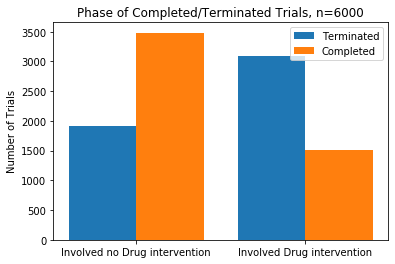

In [10]:
total['is_drug_trial'] = total['Interventions'].apply(lambda x: True if 'Drug' in x or 'drug' in x else False)
drug_vs_target = total.groupby(['is_drug_trial','target'])['Rank'].count()
drug_terminate = [drug_vs_target.values[x] for x in range(len(drug_vs_target)) if x % 2 == 0]
drug_complete = [drug_vs_target.values[x] for x in range(len(drug_vs_target)) if x % 2 != 0]
d = len(drug_terminate)
first_x = [2*element + w*1 for element in range(d)]
second_x = [2*element + w*2 for element in range(d)]
ax2 = plt.subplot()
ax2.bar(first_x, drug_terminate)
ax2.bar(second_x, drug_complete)
ax2.set_xticks([(x+y)/2 for x, y in zip(first_x, second_x)])
ax2.set_xticklabels(['Involved no Drug intervention','Involved Drug intervention'])
ax2.legend(['Terminated','Completed'], loc='best')
ax2.set_title('Phase of Completed/Terminated Trials, n=6000')
ax2.set_ylabel('Number of Trials')
plt.show()

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X = total[['Age','Gender','Enrollment','Phases','Funded Bys','Study Type','Study Designs']]
y = total[['target']]
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [12]:
industry_select = total[total['Funded Bys'].apply(lambda x: True if x == 'Other' else False) == True]
industry_select.groupby('target').count()

,Rank,NCT Number,Title,Acronym,Status,Study Results,Conditions,Interventions,Outcome Measures,Sponsor/Collaborators,...,Start Date,Primary Completion Date,Completion Date,First Posted,Results First Posted,Last Update Posted,Locations,Study Documents,URL,is_drug_trial
target,,,,,,,,,,,,,,,,,,,,,
0,2334,2334,2334,821,2334,2334,2334,2334,2332,2334,...,2332,2327,2296,2334,590,2334,2243,188,2334,2334
1,3507,3507,3507,698,3507,3507,3507,3507,3507,3507,...,3507,3507,3506,3507,67,3507,2851,256,3507,3507
